In [1]:
# modules: --------------------------------------------------------------------
import re
import script
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from base64 import b64encode
from os.path import exists
from collections import defaultdict
from IPython.core.display import display, HTML
from IPython.core.pylabtools import print_figure 
from matplotlib._pylab_helpers import Gcf
# 79: -------------------------------------------------------------------------

## Question 0

For this question, please pick a topic - such as a function, class, method,
recipe or idiom related to the pandas python library and create a short
tutorial or overview of that topic. The only rules are below.

* Pick a topic not covered in the class slides.
* Do not knowingly pick the same topic as someone else.
* Use bullet points and titles (level 2 headers) to create the equivalent of
3-5 “slides” of key points. They shouldn’t actually be slides, but please
structure your key points in a manner similar to the class slides
(viewed as a notebook).
* Include executable example code in code cells to illustrate your topic.

You do not need to clear your topic with me. If you want feedback on your
topic choice, please discuss with me or a GSI in office hours.

## Concatenate 
* Concatenate pandas objects along a particular axis with optional set logic
along the other axes.
* Combine two Series.

In [103]:
s1 = pd.Series(['a', 'b', 'c'])
s2 = pd.Series(['d', 'e', 'f'])
pd.concat([s1, s2])

0    a
1    b
2    c
0    d
1    e
2    f
dtype: object

## Concatenate 
* Concatenate pandas objects along a particular axis with optional set logic
along the other axes.
* Combine two Series.
* Combine two DataFrame objects with identical columns.

In [104]:
df1 = pd.DataFrame([['a', 1], ['b', 2], ['c', 3]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['d', 4], ['e', 5], ['f', 6]],
                   columns=['letter', 'number'])
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
2,c,3
0,d,4
1,e,5
2,f,6


## Concatenate 
* Concatenate pandas objects along a particular axis with optional set logic
along the other axes.
* Combine two Series.
* Combine two DataFrame objects with identical columns.
* Combine DataFrame objects with overlapping columns and return only those
that are shared by passing inner to the join keyword argument
(default outer).

In [105]:
df3 = pd.DataFrame([['a', 1, 'Mary'], ['b', 2, 'John'], ['c', 3, 'James']],
                   columns=['letter', 'number', 'name'])
pd.concat([df1, df3])
pd.concat([df1, df3], join='inner')

,letter,number
0,a,1
1,b,2
2,c,3
0,a,1
1,b,2
2,c,3


## Concatenate 
* Concatenate pandas objects along a particular axis with optional set logic
along the other axes.
* Combine two Series.
* Combine two DataFrame objects with identical columns.
* Combine DataFrame objects with overlapping columns and return only those
that are shared by passing in `join=inner`(default outer).
* Combine DataFrame objects horizontally along the x axis by passing in
`axis=1`(default 0).

In [106]:
df4 = pd.DataFrame([['Tom', 24], ['Jerry', 18], ['James', 22]],
                   columns=['name', 'age'])
pd.concat([df1, df4])
pd.concat([df1, df4], axis=1)

,letter,number,name,age
0,a,1,Tom,24
1,b,2,Jerry,18
2,c,3,James,22


## Question 1
### part a) 
Revise your solution to PS2 Question 3 to also include gender (RIAGENDR) in
the demographic data.

If the local environment doesn't have the file required, run the following
code to read the file directly from the website and then save the processed
files to the local environment as "demographic.plk" and
"oral health - dentition.plk".

In [225]:
def pd_demographic(url, name, year):
    '''
    Read and append the '.XPT' file of demographic datasets.

    This function will read the '.XPT' file and convert it to a DataFrame.
    Several columns are selected and renamed according to the meaning of the
    columns. Additional one column is added to the DataFrame and each column is
    convert into a appropriate type. Finally the function will return the
    processed DataFrame.

    Parameters
    ----------
    url: str
        The location of the file on the web.
    name: str
        The file's name.
    year:  str
        The conducted year of the file.

    Returns
    -------
    Processed DataFrame.
    '''
    file_name = name[:9] + ' ' + 'demographic.pickle'
    if exists(file_name):
        df = pd.read_pickle(file_name)
    else:
        url_name = url + name
        df = pd.read_sas(url_name)
        columns = ['SEQN', 'RIDAGEYR', 'RIAGENDR','RIDRETH3',
                   'DMDEDUC2', 'DMDMARTL', 'RIDSTATR', 'SDMVPSU',
                   'SDMVSTRA', 'WTMEC2YR', 'WTINT2YR']
        columns_add = ['id', 'age','gender', 'race', 'education',
                       'marital_status', 'exam_status', 
                       'psu', 'stratum', 
                       'exam_weight', 'interview_weight']
        demo_cat = {
        'gender': {1: 'Male', 2: 'Female'},
        'race': {1: 'Mexican American',
                 2: 'Other Hispanic',
                 3: 'Non-Hispanic White',
                 4: 'Non-Hispanic Black',
                 6: 'Non-Hispanic Asian',
                 7: 'Other/Multiracial'
                 },
        'education': {1: 'Less than 9th grade',
                      2: '9-11th grade (Includes 12th grade with no diploma)',
                      3: 'High school graduate/GED or equivalent',
                      4: 'Some college or AA degree',
                      5: 'College graduate or above',
                      7: 'Refused',
                      9: "Don't know"
                      },
        'marital_status': {1: 'Married',
                           2: 'Widowed',
                           3: 'Divorced',
                           4: 'Separated',
                           5: 'Never married',
                           6: 'Living with partner',
                           77: 'Refused',
                           99: "Don't know"
                           },
        'exam_status': {1: 'Interviewed only',
                        2: 'Both interviewed and MEC examined'
                        }
        }
        df = df[columns]
        df = df.convert_dtypes()
        df.columns = columns_add
        for col, d in demo_cat.items():
            df[col] = pd.Categorical(df[col].replace(d))
        cohort = 'NHANES' + ' ' + year
        df1 = pd.DataFrame({'cohort':[cohort for i in range(len(df.index))]}, 
                           index=df.index)
        df = pd.concat([df,df1], axis=1)      
        df['cohort'] = pd.Categorical(df['cohort'])
        df.to_pickle(file_name)  
    return df

In [226]:
url = 'https://wwwn.cdc.gov/Nchs/Nhanes/'
years = ['2011-2012', '2013-2014', '2015-2016', '2017-2018']
names_1 = ['DEMO_G.XPT', 'DEMO_H.XPT', 'DEMO_I.XPT', 'DEMO_J.XPT']
cohorts = (
    ('2011-2012', 'G'),
    ('2013-2014', 'H'),
    ('2015-2016', 'I'),
    ('2017-2018', 'J')
    )
demo_cohorts = {}
for i in range(4):
    name = years[i] +'/' + names_1[i]
    df = pd_demographic(url, name, years[i])
    demo_cohorts.update({cohorts[i][0]: df})
demo = pd.concat(demo_cohorts, ignore_index=True)
demo.to_pickle('demographic_1.pickle') 

In [227]:
def pd_health(utl, name, year):
    '''
    Read and append the '.XPT' file of oral health and dentition datasets.

    This function will read the '.XPT' file and convert it to a DataFrame.
    Several columns are selected and renamed according to the meaning of the
    columns. Additional one column is added to the DataFrame and each column is
    convert into a appropriate type. Finally the function will return the
    processed DataFrame.

    Parameters
    ----------
    url: str
        The location of the file on the web.
    name: str
        The file's name.
    year:  str
        The conducted year of the file.

    Returns
    -------
    Processed DataFrame.
    '''
    file_name = name[:9] + ' ' + 'oral health - dentition.pickle'
    if exists(file_name):
        df = pd.read_pickle(file_name)
    else:
        url_name = url + name
        df = pd.read_sas(url_name).copy()
        columns_li = ['SEQN', 'OHDDESTS']
        column_1 = r'OHX\d\dCTC'
        column_2 = r'OHX\d\dTC'
        columns_ctc = [m for m in df.columns if re.search(column_1,m) != None]
        columns_tc = [m for m in df.columns if re.search(column_2,m) != None]
        columns_li.extend(columns_ctc)
        columns_li.extend(columns_tc)
        df = df[columns_li]
        columns_lower = [m.lower() for m in columns_li]
        columns_lower[0] = 'id'
        columns_lower[1] = 'dentition_status'
        ohx_cat = {
            'OHDDESTS': {1: 'Complete', 2: 'Partial', 3: 'Not Done'}
            }
        tc = {
          1: 'Primary tooth present',
          2: 'Permanent tooth present',
          3: 'Dental Implant',
          4: 'Tooth not present',
          5: 'Permanent dental root fragment present',
          9: 'Could not assess'
          }
        ctc = {
          'A': 'Primary tooth with a restored surface condition',
          'D': 'Sound primary tooth',
          'E': 'Missing due to dental disease',
          'F': 'Permanent tooth with a restored surface condition',
          'J':
            'Permanent root tip is present but no restorative replacement is present',
          'K': 'Primary tooth with a dental carious surface condition',
          'M': 'Missing due to other causes',
          'P':
             'Missing due to dental disease but replaced by a removable restoration',
          'Q':
            'Missing due to other causes but replaced by a removable restoration',
          'R':
            'Missing due to dental disease but replaced by a fixed restoration',
          'S': 'Sound permanent tooth',
          'T':
            'Permanent root tip is present but a restorative replacement is present',
          'U': 'Unerupted',
          'X': 'Missing due to other causes but replaced by a fixed restoration',
          'Y': 'Tooth present, condition cannot be assessed',
          'Z': 'Permanent tooth with a dental carious surface condition'
         }
        for col, d in ohx_cat.items():
            df[col] = pd.Categorical(df[col].replace(d))
        for col in columns_tc:
            df[col] = pd.Categorical(df[col].replace(tc))
        for col in columns_ctc:
            df[col] = df[col].apply(lambda x: x.decode('utf-8'))
            df[col] = pd.Categorical(df[col].replace(ctc))
        df.columns = columns_lower
        cohort = 'NHANES' + ' ' + year
        df1 = pd.DataFrame({'cohort':[cohort for i in range(len(df.index))]}, 
                           index=df.index)
        df = pd.concat([df,df1], axis=1)  
        df['cohort'] = pd.Categorical(df['cohort'])
        df['id'] = df['id'].astype('int64')
        df.to_pickle(file_name)  
    return df

In [228]:
url = 'https://wwwn.cdc.gov/Nchs/Nhanes/'
years = ['2011-2012', '2013-2014', '2015-2016', '2017-2018']
names_2 = ['OHXDEN_G.XPT', 'OHXDEN_H.XPT', 'OHXDEN_I.XPT', 'OHXDEN_J.XPT']
cohorts = (
    ('2011-2012', 'G'),
    ('2013-2014', 'H'),
    ('2015-2016', 'I'),
    ('2017-2018', 'J')
    )
ohx_cohorts = {}
for i in range(4):
    name = years[i] +'/' + names_2[i]
    df = pd_health(url, name, years[i])
    ohx_cohorts.update({cohorts[i][0]: df})
ohx = pd.concat(ohx_cohorts, ignore_index=True)
ohx.to_pickle('oral health - dentition_1.pickle') 

F:\python\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


If the files is already loaded in the local environment, read the files from
the local environment. The variable gender (RIAGENDR) is already included 
in the demographic data as I revise my solution to PS2 Question 3. 

In [2]:
demo = pd.read_pickle('demographic_1.pickle') 
ohx = pd.read_pickle('oral health - dentition_1.pickle')

### part b) 

In [3]:
merge_data = pd.merge(
    demo, ohx.loc[:,['id', 'dentition_status']], how='left', on='id')

In this step, I set the "college" column to two levels with
"some college/college graduate" and "No college/<20".

In [4]:
merge_data['education'] = merge_data.apply(
    lambda x: 1 if (x['education']=='Some college or AA degree' or
                    x['education'] == 'College graduate or above')
    else 0, axis=1)

In [5]:
edu_col = {
    1: 'some college/college graduate',
    0: 'No college/<20'
}
merge_data['education'] = pd.Categorical(
    merge_data['education'].replace(edu_col)
)

Change the colomns' name.

In [6]:
col = {
    'id': 'id',
    'gender': 'gender',
    'age': 'age',
    'education': 'college',
    'exam_status': 'exam_status',
    'dentition_status': 'ohx_status'
}

In [7]:
merge_data = merge_data[list(col.keys())].rename(columns=col)

Here I create a new column called "under_20" and this column has two levels
with True(younger than 20) and False(age equal or order than 20).

In [8]:
merge_data['under_20'] = merge_data['age'].apply(lambda x: 1 if x<20 else 0)
age_col = {
    1:True,
    0:False
}
merge_data['under_20'] = pd.Categorical(
    merge_data['under_20'].replace(age_col)
)

Here I create I new column called "ohx" with two levels: complete and
missing.

In [9]:
merge_data['ohx'] = merge_data.apply(
    lambda x: 1 if (x['exam_status']=='Both interviewed and MEC examined' and
                    x['ohx_status'] == 'Complete')
    else(0 if x['ohx_status']!='Complete' else np.nan),axis=1)

In [10]:
ohx_col = {
    1:'complete',
    0:'missing'
}

In [11]:
merge_data['ohx'] = pd.Categorical(merge_data['ohx'].replace(ohx_col))

Display the final result with seven columns: id, gender, age, college,
exam_status, ohx_status, under_20 and ohx required in the question.

In [12]:
merge_data

,id,gender,age,college,exam_status,ohx_status,under_20,ohx
0,62161,Male,22.0,No college/<20,Both interviewed and MEC examined,Complete,False,complete
1,62162,Female,3.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete
2,62163,Male,14.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete
3,62164,Female,44.0,some college/college graduate,Both interviewed and MEC examined,Complete,False,complete
4,62165,Female,14.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete
...,...,...,...,...,...,...,...,...
39151,102952,Female,70.0,No college/<20,Both interviewed and MEC examined,Complete,False,complete
39152,102953,Male,42.0,No college/<20,Both interviewed and MEC examined,Complete,False,complete
39153,102954,Female,41.0,some college/college graduate,Both interviewed and MEC examined,Complete,False,complete
39154,102955,Female,14.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete


### Part c) 
Remove rows from individuals with `exam_status != 2` as this form of
missingness is already accounted for in the survey weights. Report the number
of subjects removed and the number remaining.

In [13]:
merge_data = merge_data.drop(
    merge_data[
        merge_data['exam_status'] != 'Both interviewed and MEC examined'
        ].index)

In [14]:
merge_data

,id,gender,age,college,exam_status,ohx_status,under_20,ohx
0,62161,Male,22.0,No college/<20,Both interviewed and MEC examined,Complete,False,complete
1,62162,Female,3.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete
2,62163,Male,14.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete
3,62164,Female,44.0,some college/college graduate,Both interviewed and MEC examined,Complete,False,complete
4,62165,Female,14.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete
...,...,...,...,...,...,...,...,...
39151,102952,Female,70.0,No college/<20,Both interviewed and MEC examined,Complete,False,complete
39152,102953,Male,42.0,No college/<20,Both interviewed and MEC examined,Complete,False,complete
39153,102954,Female,41.0,some college/college graduate,Both interviewed and MEC examined,Complete,False,complete
39154,102955,Female,14.0,No college/<20,Both interviewed and MEC examined,Complete,True,complete


Drop 1757 rows and remain 37399 rows.

### Part d)
Construct a table with `ohx` (complete / missing) in columns and each of the
following variables summarized in rows:

* age
* under_20
* gender
* college

For the rows corresponding to categorical variable in your table, each cell
should provide a count (n) and a percent (of the row) as a nicely formatted
string. For the continous variable age, report the mean and standard
deviation [Mean (SD)] for each cell.

Include a column ‘p-value’ giving a p-value testing for a mean difference in
age or an association beween each categorical varaible and missingness. Use a
chi-squared test comparing the 2 x 2 tables for each categorical
characteristic and OHX exam status and a t-test for the difference in age.

First I will construct the table required above. "Age" will correspond to an
individual row in the table and the rest of three variables will correspond
to two rows each. There are two columns in the table with "ohx" is missing
or complete.

In [15]:
newtab = merge_data.loc[:,['age','under_20','gender','college','ohx']]

In [16]:
def cal(df):
    '''
    Calculate the mean and variance of the age in terms of "ohx" 
    column.

    Parameters
    ----------
    df : DataFrame

    Returns
    -------
    DataFrame with the mean and variance of the age.
    '''
    return(pd.DataFrame({
        'age': '({0:3.1f}, {1:3.1f})'.format(
            df['age'].mean(), df['age'].std()
        )
    }, index=[0]))

In [17]:
result = (
    newtab
    .groupby(['ohx'])
    .apply(lambda x: cal(x))
    .reset_index(level=1, drop=True)
    .stack()
    .unstack(level=0)
)

In [18]:
def count_per(df,var):
    '''
    Count the number and percent of each variable
    in terms of "ohx" column.

    Parameters
    ----------
    df : DataFrame
        The DataFrame contains the information we need.
    var : str
        The kind of variable we need to calculate.

    Returns
    -------
    DataFrame with the counting and percentile 
    information.
    '''
    b = (
        df
        .groupby(['ohx',var])
        .apply(lambda x: x[var].count())
        )
    b_pre = pd.DataFrame(
        b.groupby(var).agg(lambda x: [x[0]/(x[0]+x[1]), x[1]/(x[0]+x[1])]),
        columns=['percent'])
    b = pd.merge(b.unstack(level=0),b_pre,on=var)
    b.iloc[0,0] = '({0:4.0f}, {1:3.1f}%)'.format(b.iloc[0,0], b.iloc[0,2][0]*100)
    b.iloc[0,1] = '({0:4.0f}, {1:3.1f}%)'.format(b.iloc[0,1], b.iloc[0,2][1]*100)
    b.iloc[1,0] = '({0:4.0f}, {1:3.1f}%)'.format(b.iloc[1,0], b.iloc[1,2][0]*100)
    b.iloc[1,1] = '({0:4.0f}, {1:3.1f}%)'.format(b.iloc[1,1], b.iloc[1,2][1]*100)
    b = b.drop(columns = ['percent'])
    return b

In [19]:
tab = ['under_20','gender','college']
for m in tab:
    result = pd.concat([result,count_per(newtab,m)])

In [20]:
result['index'] = ['age', 'under_20','under_20', 'gender', 'gender',
                   'college', 'college']
result = result.reset_index()
result = (
    result
    .rename(columns={'level_0':'type','index':'variables'})
    .set_index(['variables','type'])
)
result.columns.names = [None]

In [21]:
p_res = result.reset_index()

Apply the t test to check the difference in mean and calculate the p value.
`stats.ttest_ind()` is used to do the t test in python.

In [22]:
mean_c = float(p_res.loc[0,'complete'][1:5])
std_c = float(p_res.loc[0,'complete'][7:11])
mean_m = float(p_res.loc[0,'missing'][1:5])
std_m = float(p_res.loc[0,'missing'][7:11])
est = abs(mean_m-mean_c)/np.sqrt(std_m**2/(34360) + std_c ** 2/(3039))
p = 2*(1-stats.norm.cdf(est))

In [23]:
x = newtab[newtab['ohx']=='complete']['age']
y = newtab[newtab['ohx']=='missing']['age']

In [24]:
p = stats.ttest_ind(x,y, equal_var=False)[1]
if p<0.001:
    p = 'p<0.001'
else:
    p = p

For the following codes, I calculate the p value of 2*2 contingency table
test. `stats.chi2_contingency()` is used to do the chi-squre test in python.

In [25]:
def chi_test(df):
    '''
    Calculate the p value of 2*2 contingency table test.

    Parameters
    ----------
    df : DataFrame

    Returns
    -------
    p value of 2*2 contingency table test.
    '''
    a = float(df.loc[0,'complete'][1:6])
    b = float(df.loc[0,'missing'][1:5])
    c = float(df.loc[1,'complete'][1:6])
    d = float(df.loc[1,'missing'][1:5])
    ee = np.array([[a,b],[c,d]])
    return(stats.chi2_contingency(ee,correction=False)[1])

In [26]:
p_value = [p]
for i in range(0,6,2):
    df = p_res.loc[i+1:i+2,:].reset_index(drop=True)
    p = chi_test(df)
    if i != 2:
        if p<0.001:
            p_value.extend(['p<0.001','-'])
        else:
            p_value.extend([str(p),'-'])
    else:
        p_value.extend([str(p)[:6],'-'])

In [27]:
p_res['p value'] = p_value

In [28]:
p_res = p_res.set_index(['variables','type'])

In [29]:
p_res

complete        missing  \
variables type                                                           
age       age                              (33.2, 24.4)   (22.0, 26.6)   
under_20  False                          (20369, 94.1%)   (1277, 5.9%)   
          True                           (13991, 88.8%)  (1762, 11.2%)   
gender    Female                         (17342, 91.4%)   (1626, 8.6%)   
          Male                           (17018, 92.3%)   (1413, 7.7%)   
college   No college/<20                 (22974, 90.4%)   (2427, 9.6%)   
          some college/college graduate  (11386, 94.9%)   ( 612, 5.1%)   

                                         p value  
variables type                                    
age       age                            p<0.001  
under_20  False                          p<0.001  
          True                                 -  
gender    Female                          0.0013  
          Male                                 -  
college   No college/<20                 p<0.001  
          some college/college graduate        -

In [30]:
tab = p_res.to_html(escape=False, justify='left')
cap = """
<b> Table 1.</b> <em> 2*2 column table for each variable.</em>
For variables under_20, gender and college, we display a 2*2 column table
to count the number and the percentage of each cell, for variable age, we
calculate the mean and standard error of each cell.
The column 'p-value' gives a p-value testing for a mean difference 
in age or an chi-square test for the association beween each categorical
varaible and missingness. 
"""
tb = tab.rsplit('\n')
tb.insert(1, cap)
tab = '<center>'
for i, line in enumerate(tb):
    tab += line
    if i < (len(tb) - 1):
        tab += '\n'
tab += '</center>'
display(HTML(tab))

## Question 2
In this question you will use your functions from problem set 1, question 3
for construcing binomial confidence intervals for a population proprotion in
a Monte Carlo study comparing the performance of the programmed methods.

In the instructions that follow, let n refer to sample size and p to the
population proportion to be estimated.

Choose a nominal confidence level of 80, 90 or 95% to use for all parts
below.

You may wish to collect your confidence interval functions in a separate file
and import them for this assignment. See here for helpful discussion.

### part a) Level Calibration

In this part, you will examine whether the nominal confidence level is
achieved by each method over a grid of values for n and p. Recall that the
confidence level is the proportion of intervals that (nominally should)
contain the true population proportion.

Pick a sequence of values to examine for $p\in(0,0.5]$ or $p\in[0.5,1)$ and a
sequence of values for $n>0$. For each combination of n and p use Monte Carlo
simulation to estimate the actual confidence level each method for generating
intervals achieves. Choose the number of Monte Carlo replications so that, if
the nominal level were achieved, the margin of error around your Monte Carlo
estimate of the confidence level would be no larger than $0.005$.

For each confidence interval method, construct a contour plot (with axes $n$
and $p$) showing the estimated confidence level. Use subplots to collect
these into a single figure.

**For this problem I choose 90% as the nominal confidence level**. Therefore,
the confidence level of estimates in my Monte Carlo simulation is also 90%.

In [42]:
level = [80, 90, 95]
p_grid = [0.5,0.6,0.7,0.8,0.9]
n_grid = [250,500,750,1000]
method = ['Normal', 'Binomial', 'Clopper-Pearson', 'Jeffrey', 'Agresti-Coull']
p = 0.9
rep = 2 * p*(1-p)/(0.005/stats.norm.ppf(0.95))**2
rep = int(rep)

In order to achieve the requirement that the margin of error around Monte
Carlo estimate of the confidence level would be no larger than  0.005, I use
the following equation to calculate the repeat times in Monte Carlo estimate.
$$z_{1-\alpha/2}\sqrt{\frac{p(1-p)}{n}}<0.005$$
where $p=0.9$ and $\alpha=0.1$ in my condition. 

In order to make sure that all the margin error is less than 0.005, I
multiple the repeat times with 2 and get my final repeat times.

In [43]:
rng = np.random.default_rng(10 * 1 + 2021)

In this step I apply the Monte Carlo simulation and return three DataFrames
contain the information with actual confidence level, width of confidence
interval and relative width of confidence interval. I choose
$n = 250,500,750,1000$ and $p=0.5,0.6,0.7,0.8,0.9$. For each n and p I
calculate the actual confidence level of five different methods. The nomial
confidence level is 90%.

In [44]:
def Monte_Carlo(n_grid, p_grid, level, method, rep):
    '''
    Applying Monte Carlo simulation to calculate the 
    confidence interval, width and relative width of
    the confidence for different n and different p in 
    terms of five calculating method.

    Parameters
    ----------
    n_grid : List
        The number of n in simulation.
    p_grid : List
        The number of p in simulation.
    level : int
        The confidence level in simulation.
    method : str
        The method used in calculating confidence 
        interval
    rep : int
        Repeat times in simulation
        
    Returns
    -------
    Three DataFrames contains the simulation result of 
    confidence level, width and relatively width of
    confidence interval.
    '''
    res = defaultdict(list)
    wid = defaultdict(list)
    re_wid = defaultdict(list)
    total_time = 0
    for n in tqdm(n_grid):
        for p in tqdm(p_grid):
            for k in range(rep):
                res['n,p'].append((round(n,0),round(p,4)))
                wid['n,p'].append((round(n,0),round(p,4)))
                re_wid['n,p'].append((round(n,0),round(p,4)))
                data = np.random.binomial(n=1,p=p,size=n)
                conf_Pearson = script.Binomial_est(
                    data, level, 'Clopper-Pearson', string_set = None
                )
                conf_width_Pearson = conf_Pearson['upr'] - conf_Pearson['lwr']
                for name in method:
                    conf = script.Binomial_est(
                        data, level, name, string_set = None
                    )
                    conf_width = conf['upr'] - conf['lwr']
                    wid[name].append(conf_width)
                    re_wid[name].append(conf_width/conf_width_Pearson)
                    if p<conf['lwr'] or p>conf['upr']:
                        res[name].append(0)
                    else:
                        res[name].append(1)
    res = pd.DataFrame(res)
    result = res.groupby(['n,p']).agg(lambda x: (
        '<center>{0:6.4f} <br> ({1:6.4f}, {2:6.4f})</center>'.format(
            np.mean(x), 
            np.mean(x) - 1.64 * np.std(x) / np.sqrt(len(x)),
            np.mean(x) + 1.64 * np.std(x) / np.sqrt(len(x))
        )))
    wid = pd.DataFrame(wid)
    width = wid.groupby(['n,p']).agg(lambda x: (
        '<center>{0:6.4f} <br> ({1:6.4f}, {2:6.4f})</center>'.format(
            np.mean(x), 
            np.mean(x) - 1.64 * np.std(x) / np.sqrt(len(x)),
            np.mean(x) + 1.64 * np.std(x) / np.sqrt(len(x))
        )))
    re_wid = pd.DataFrame(re_wid)
    re_width = re_wid.groupby(['n,p']).agg(lambda x: (
        '<center>{0:6.4f} <br> ({1:6.4f}, {2:6.4f})</center>'.format(
            np.mean(x), 
            np.mean(x) - 1.64 * np.std(x) / np.sqrt(len(x)),
            np.mean(x) + 1.64 * np.std(x) / np.sqrt(len(x))
        )))
    return(result, width, re_width)

In [45]:
res_90, wid_90, relative_wid_90 = Monte_Carlo(n_grid, p_grid, 90, method, rep)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [39:03<00:00, 584.95s/it]


Save the result in my local environment in case that I don't need to repeat
the code again when data is missing, which is time-consuming.

In [54]:
res_90.to_pickle('Estimated confidence level.pickle')
wid_90.to_pickle('Width of confidence interval.pickle')
relative_wid_90.to_pickle('Relative width of confidence interval.pickle')

Display the result in a formatted table.

In [60]:
tab = res_90.to_html(escape=False, justify='left')
cap = """
<b> Table 2.</b> <em> Actual confidence level of each method.</em>
Choose n from 250, 500, 750, 1000 and p from 0.5,0.6,0.7,0.8,0.9. For each 
group of n,p apply Monte Carlo simulation for each binominal method to estimate
the actual confidence level when the nominal confidence level is 90. The repeat 
times of the Monte Carlo simulation is 100000 to make sure the width of 
estimate confidence interval is less than 0.005. The confidence level of the 
estimated result is also 90.
"""
tb = tab.rsplit('\n')
tb.insert(1, cap)
tab = '<center>'
for i, line in enumerate(tb):
    tab += line
    if i < (len(tb) - 1):
        tab += '\n'
tab += '</center>'
display(HTML(tab))

,Normal,Binomial,Clopper-Pearson,Jeffrey,Agresti-Coull
"n,p",,,,,
"(250, 0.5)","0.8869 (0.8832, 0.8906)","0.8869 (0.8832, 0.8906)","0.9131 (0.9098, 0.9164)","0.8869 (0.8832, 0.8906)","0.8869 (0.8832, 0.8906)"
"(250, 0.6)","0.8951 (0.8915, 0.8987)","0.8951 (0.8915, 0.8987)","0.9197 (0.9165, 0.9229)","0.8951 (0.8915, 0.8987)","0.8951 (0.8915, 0.8987)"
"(250, 0.7)","0.9047 (0.9012, 0.9081)","0.9047 (0.9012, 0.9081)","0.9182 (0.9149, 0.9214)","0.9047 (0.9012, 0.9081)","0.9047 (0.9012, 0.9081)"
"(250, 0.8)","0.8990 (0.8954, 0.9025)","0.8990 (0.8954, 0.9025)","0.9164 (0.9132, 0.9197)","0.9017 (0.8982, 0.9052)","0.8990 (0.8954, 0.9025)"
"(250, 0.9)","0.8803 (0.8765, 0.8841)","0.8803 (0.8765, 0.8841)","0.9298 (0.9268, 0.9328)","0.9111 (0.9078, 0.9145)","0.8803 (0.8765, 0.8841)"
"(500, 0.5)","0.8984 (0.8948, 0.9019)","0.8984 (0.8948, 0.9019)","0.8984 (0.8948, 0.9019)","0.8984 (0.8948, 0.9019)","0.8984 (0.8948, 0.9019)"
"(500, 0.6)","0.8994 (0.8958, 0.9029)","0.8994 (0.8958, 0.9029)","0.9093 (0.9060, 0.9127)","0.8994 (0.8958, 0.9029)","0.8994 (0.8958, 0.9029)"
"(500, 0.7)","0.9066 (0.9032, 0.9100)","0.9066 (0.9032, 0.9100)","0.9161 (0.9129, 0.9194)","0.8975 (0.8940, 0.9011)","0.9066 (0.9032, 0.9100)"
"(500, 0.8)","0.8938 (0.8902, 0.8974)","0.8938 (0.8902, 0.8974)","0.9164 (0.9132, 0.9197)","0.8929 (0.8892, 0.8965)","0.8938 (0.8902, 0.8974)"


Construct the contour plot.

In [56]:
new_res = res_90
new_res = new_res.applymap(lambda x: float(x[8:14]))

In [57]:
X,Y = np.meshgrid(n_grid, p_grid)
Z = np.zeros(shape=(5,5,4))
for i in range(len(method)):
    Z[i] = np.array(new_res[method[i]]).reshape(4,5).transpose()


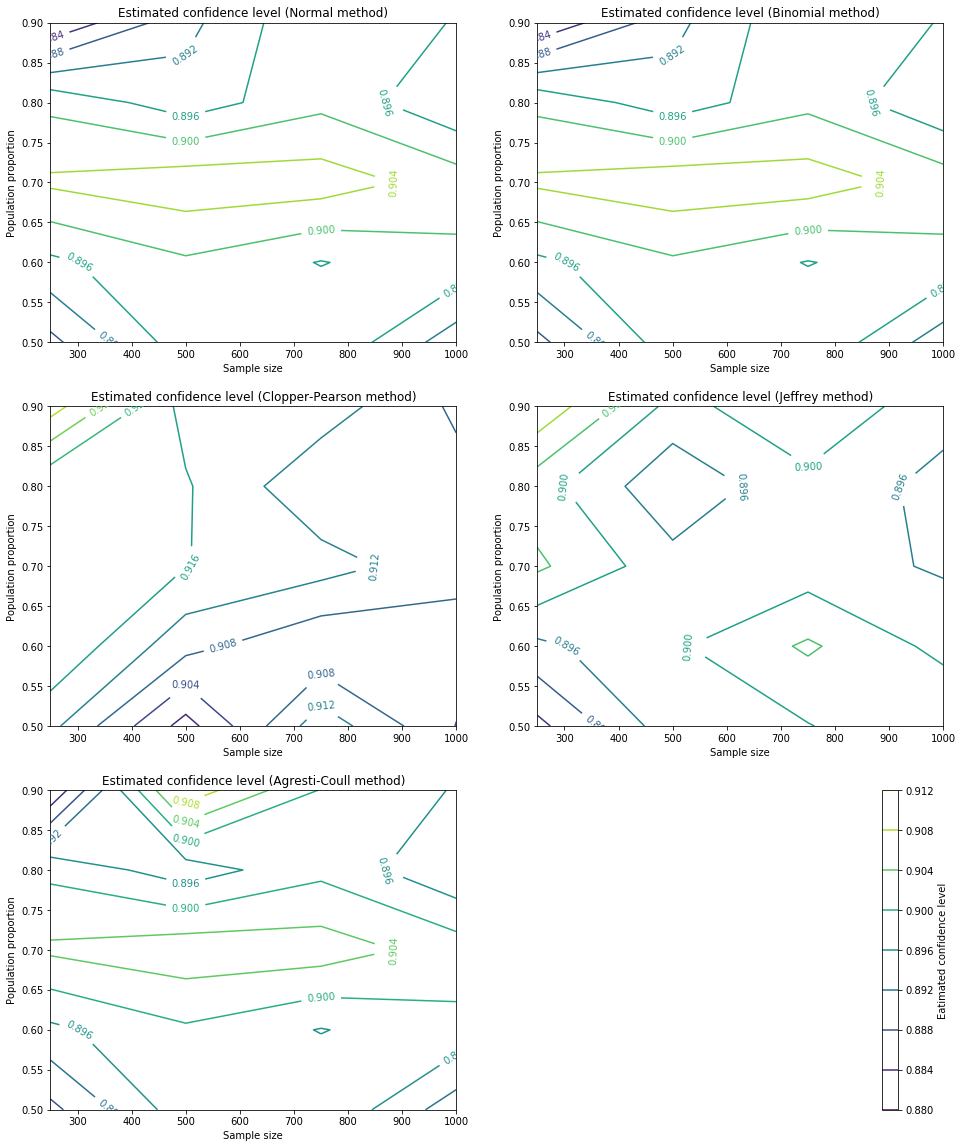

In [58]:
fig1, ax = plt.subplots(3, 2)
_ = fig1.set_size_inches(16, 20)
ax[-1, -1].axis('off')
for i in range(5):
    y = i % 2
    x = [0,0,1,1,2]
    CS = ax[x[i],y].contour(X,Y,Z[i])
    ax[x[i],y].clabel(CS, inline=True, fontsize=10)
    ax[x[i],y].set_ylabel('Population proportion')
    ax[x[i],y].set_xlabel('Sample size')
    ax[x[i],y].set_title(
        'Estimated confidence level ({0:s} method)'.format(method[i])
    )
CB = fig1.colorbar(CS, shrink=1)
CB.ax.set_ylabel('Eatimated confidence level')
fig = Gcf.get_all_fig_managers()[-1].canvas.figure
image_data = ("data:image/png;base64,%s" % b64encode(print_figure(fig))
    .decode("utf-8"))
Gcf.destroy_fig(fig)
HTML(
"""
<b><center> Figure 1.</b> 
<em>Contour plot showing the estimated confidence level for each binominal 
method</em>
<br> <img src='%s'> <br>
"""
% image_data
)

### part b) Relative Efficiency

Create the contour plot with n, p and the width of confidence interval
correspond to each group of n and p.


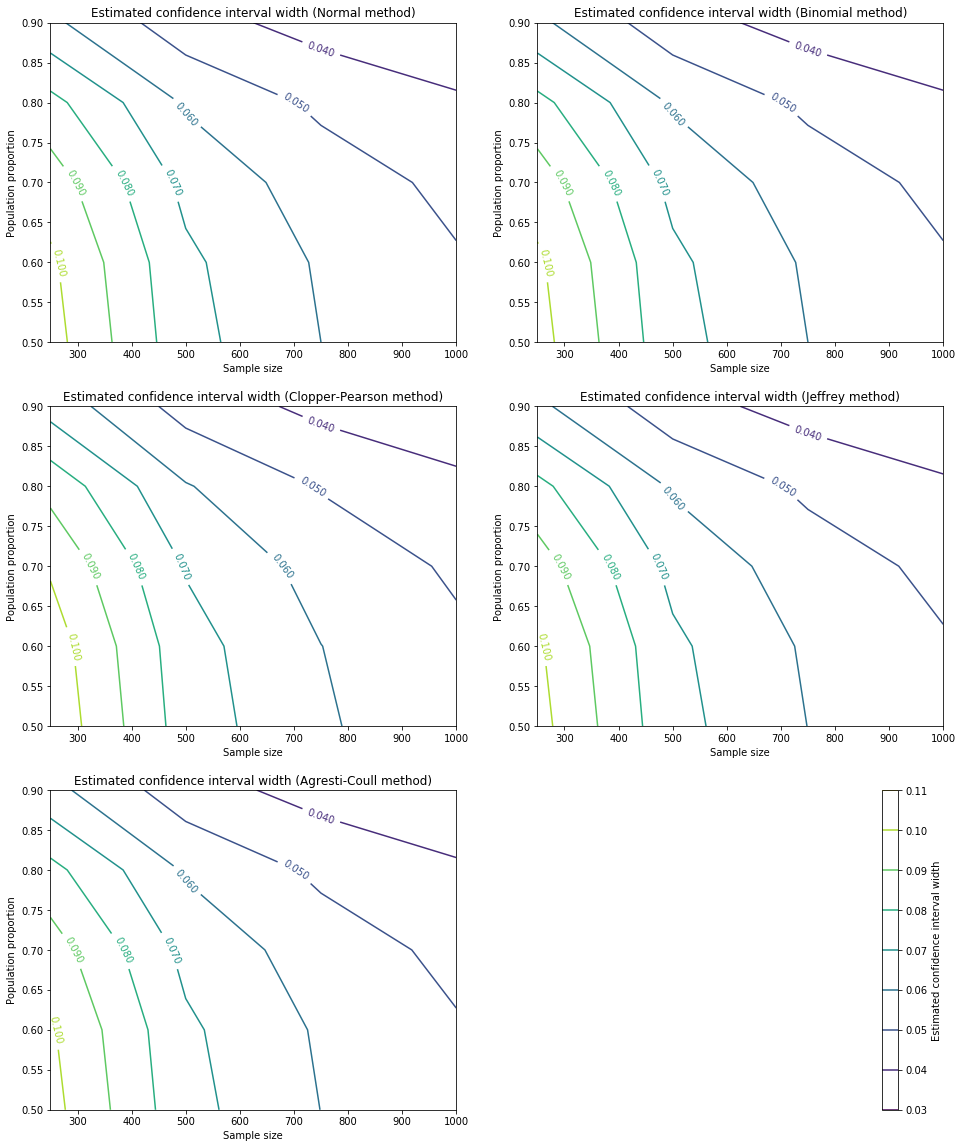

In [50]:
new_res = wid_90
new_res = new_res.applymap(lambda x: float(x[8:14]))
X,Y = np.meshgrid(n_grid, p_grid)
Z = np.zeros(shape=(5,5,4))
for i in range(len(method)):
    Z[i] = np.array(new_res[method[i]]).reshape(4,5).transpose()
fig2, ax = plt.subplots(3, 2)
_ = fig2.set_size_inches(16, 20)
ax[-1, -1].axis('off')
for i in range(5):
    y = i % 2
    x = [0,0,1,1,2]
    CS = ax[x[i],y].contour(X,Y,Z[i])
    ax[x[i],y].clabel(CS, inline=True, fontsize=10)
    ax[x[i],y].set_ylabel('Population proportion')
    ax[x[i],y].set_xlabel('Sample size')
    ax[x[i],y].set_title(
        'Estimated confidence interval width ({0:s} method)'.format(method[i])
    )
CB = fig2.colorbar(CS, shrink=1)
CB.ax.set_ylabel('Estimated confidence interval width')
fig = Gcf.get_all_fig_managers()[-1].canvas.figure
image_data = ("data:image/png;base64,%s" % b64encode(print_figure(fig))
    .decode("utf-8"))
Gcf.destroy_fig(fig)
HTML(
"""
<b><center> Figure 2.</b> 
<em>Contour plot showing the width of the estimated confidence level for each 
binominal method.</em>
<br> <img src='%s'> <br>
"""
% image_data
)

Create the contour plot with n, p and the relative width of confidence
interval correspond to each group of n and p.


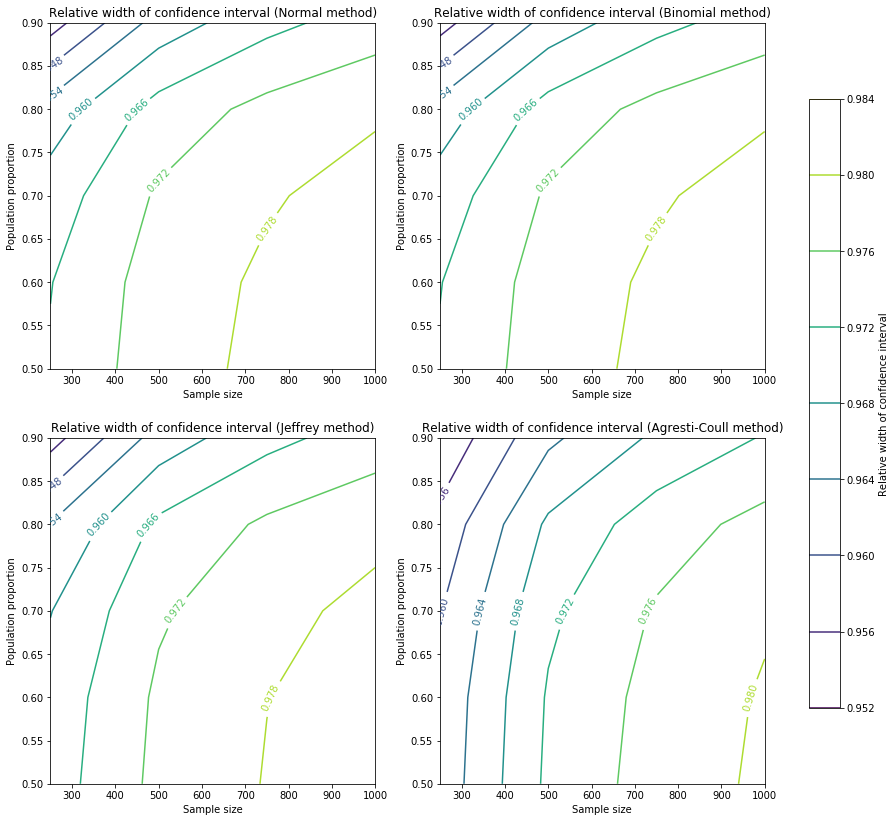

In [176]:
new_res = relative_wid_90
new_res = new_res.applymap(lambda x: float(x[8:14]))
X,Y = np.meshgrid(n_grid, p_grid)
Z = np.zeros(shape=(5,5,4))
for i in range(len(method)):
    Z[i] = np.array(new_res[method[i]]).reshape(4,5).transpose()
fig3, ax = plt.subplots(2, 2)
_ = fig3.set_size_inches(16, 14)
for i in [0,1,3,4]:
    y = [0,1,0,0,1]
    x = [0,0,1,1,1]
    CS = ax[x[i],y[i]].contour(X,Y,Z[i])
    ax[x[i],y[i]].clabel(CS, inline=True, fontsize=10)
    ax[x[i],y[i]].set_ylabel('Population proportion')
    ax[x[i],y[i]].set_xlabel('Sample size')
    ax[x[i],y[i]].set_title(
        'Relative width of confidence interval ({0:s} method)'
            .format(method[i])
    )
CB = fig3.colorbar(CS, ax=ax,shrink=0.8)
CB.ax.set_ylabel('Relative width of confidence interval')
fig = Gcf.get_all_fig_managers()[-1].canvas.figure
image_data = ("data:image/png;base64,%s" % b64encode(print_figure(fig))
    .decode("utf-8"))
Gcf.destroy_fig(fig)
HTML(
"""
<b><center> Figure 3.</b> 
<em>Contour plot showing the relative width of the estimated confidence level 
for each binominal method
(Clopper-Pearson method as a reference). Omit Clopper-Pearson method in this
plot because this method is used as a criteria. So, there is no need to plot
as the result will all be 1.</em>
<br> <img src='%s'> <br>
"""
% image_data
)